In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('mode.chained_assignment', None)

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Análise de Componentes Principais (ACP)

### 1 Usando a matriz de covariâncias $\boldsymbol{S}$ (não é a melhor opção)

Dados de doze empresas e 3 variáveis - exemplo de MINGOTI (2005). Vamos criar o *dataframe* usando a função *DataFrame* do *pandas*. Poderíamos também ter os dados salvos em uma planilha e usar a função *read_csv* para lê-la.

In [2]:
# ganho bruto - B (X1)
# ganho líquido - L (X2)
# patrimônio acumulado - P (X3)
emp = pd.DataFrame({'B': [9893,8776,13572,6455,5129,5432,3807,3423,3708,3294,5433,6287],
                  'L': [564,389,1103,743,203,215,385,187,127,297,432,451],
                  'P': [17689,17359,18597,8745,14397,3467,4679,6754,2275,6754,5589,8972]})
emp

,B,L,P
0,9893,564,17689
1,8776,389,17359
2,13572,1103,18597
3,6455,743,8745
4,5129,203,14397
5,5432,215,3467
6,3807,385,4679
7,3423,187,6754
8,3708,127,2275
9,3294,297,6754


In [3]:
# resumo do conjunto de dados
emp.describe()

,B,L,P
count,12.000000,12.000000,12.000000
mean,6267.416667,424.666667,9606.416667
std,3090.405900,276.169360,5865.842906
min,3294.000000,127.000000,2275.000000
25%,3782.250000,212.000000,5361.500000
50%,5432.500000,387.000000,7749.500000
75%,7035.250000,479.250000,15137.500000
max,13572.000000,1103.000000,18597.000000


In [4]:
# obter n
n = emp.shape[0]
n

12

In [5]:
# obter p
p = emp.shape[1]
p

3

In [6]:
# vetor de médias
emp.mean()

B    6267.416667
L     424.666667
P    9606.416667
dtype: float64

In [7]:
# matriz de covariâncias
S = emp.cov()
S

,B,L,P
B,9.550609e+06,706121.060606,1.497823e+07
L,7.061211e+05,76269.515152,9.339151e+05
P,1.497823e+07,933915.060606,3.440811e+07


In [8]:
# matriz de correlações
R = emp.corr()
R

,B,L,P
B,1.000000,0.827348,0.826256
L,0.827348,1.000000,0.576503
P,0.826256,0.576503,1.000000


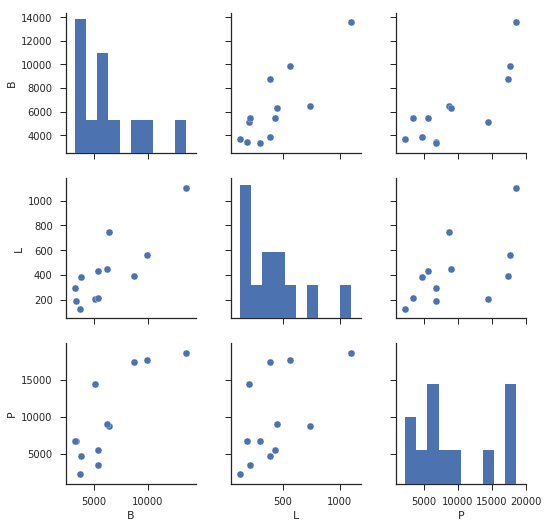

In [9]:
sns.set(style='ticks')
sns.pairplot(emp);

### Decomposição espectral: autovalores e autovetores

In [10]:
# autovalores e autovetores de S
l, e = np.linalg.eig(S)
print(l)
print(e)

[  4.14743915e+07   2.53950713e+06   2.10925256e+04]
[[ 0.42509725  0.8997068   0.09909593]
 [ 0.02766083  0.09651661 -0.99494694]
 [ 0.90472493 -0.42569029 -0.01614231]]


#### Garantir que autovalores ordenados em ordem descrescente

In [11]:
l, e = np.linalg.eig(S)
idx = np.argsort(l)[::-1]
l = l[idx]
e = e[:,idx]
print(l)
print(e)

[  4.14743915e+07   2.53950713e+06   2.10925256e+04]
[[ 0.42509725  0.8997068   0.09909593]
 [ 0.02766083  0.09651661 -0.99494694]
 [ 0.90472493 -0.42569029 -0.01614231]]


Verificar que a soma das variâncias de $\boldsymbol(Y)$ é igual à soma das variâncias de $\boldsymbol(X)$, ou seja, $\sum \lambda_i$ = $\sum \sigma_{ii}$.

In [12]:
# soma das variâncias de X é o traço da matriz S
np.trace(S)

44034991.13636364

In [13]:
# soma das variâncias de Y é a soma dos autovalores
np.sum(l)

44034991.13636364

In [14]:
# mas a soma das variâncias de Y também é o traço da matriz Lambda
L = np.diag(l)
print(L)
np.trace(L)

[[  4.14743915e+07   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.53950713e+06   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   2.10925256e+04]]


44034991.13636364

In [15]:
# autovalores e autovetores de R
l, e = np.linalg.eig(R)
idx = np.argsort(l)[::-1]
l = l[idx]
e = e[:,idx]
print(l)
print(e)

[ 2.49253211  0.42349813  0.08396976]
[[ 0.61670267 -0.00126721  0.78719515]
 [ 0.55679445 -0.70619694 -0.43733949]
 [ 0.556469    0.70801432 -0.43480796]]


### Análise de Componentes Principais

Usando scikit-learn

**Atenção:** primeiro faremos a análise de componentes principais usando a matriz de covariâncias, mas essa não é a melhor opção na maior parte das situações. Isso ocorre porque algumas variáveis tendem a ter variâncias muito maiores do que outras e acabam dominando a análise.

In [16]:
X = emp

In [17]:
pca = PCA() 
resultado_pca = pca.fit_transform(X)  # se a matriz de correlações R for usada, colocar scale(X) em vez de X
resultado = pd.DataFrame({'cp1': resultado_pca[:, 0], 'cp2': resultado_pca[:, 1]})

In [18]:
# coeficientes dos CPs (autovetores)
# cada linha é um CP
pca.components_

array([[ 0.42509725,  0.02766083,  0.90472493],
       [-0.8997068 , -0.09651661,  0.42569029],
       [-0.09909593,  0.99494694,  0.01614231]])

In [19]:
# variâncias dos CPs (autovalores)
pca.explained_variance_

array([  4.14743915e+07,   2.53950713e+06,   2.10925256e+04])

In [20]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  94.19,   99.96,  100.01])

In [21]:
# escores dos dois primeiros CPs
resultado

,cp1,cp2
0,8857.594255,165.267260
1,8079.360752,1046.652367
2,11257.926468,-2810.249726
3,-690.798614,-566.191163
4,3844.090910,3084.940522
5,-5915.416219,-1841.623669
6,-5504.970291,119.928682
7,-3796.380242,1367.833726
8,-7729.150154,-789.458508
9,-3848.175097,1473.279076


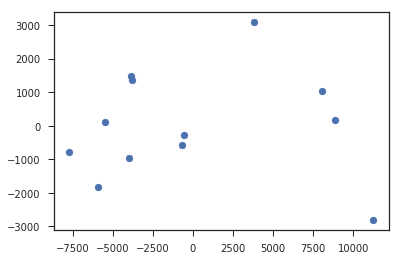

In [22]:
plt.scatter(resultado_pca[:, 0], resultado_pca[:, 1]);

In [23]:
# mostrar escores do CP1 
escores_pc1 = pd.DataFrame(data=resultado_pca[:, 0], columns=['CP1'])

In [24]:
escores_pc1

,CP1
0,8857.594255
1,8079.360752
2,11257.926468
3,-690.798614
4,3844.090910
5,-5915.416219
6,-5504.970291
7,-3796.380242
8,-7729.150154
9,-3848.175097


In [25]:
# só mostrando os menores ou maiores escores do CP1 (ascending=True é para ordem crescente)
(escores_pc1
 .sort_values(by='CP1', ascending=True)
 .loc[:,['CP1']]
 .iloc[:20,:])

,CP1
8,-7729.150154
5,-5915.416219
6,-5504.970291
10,-3989.162413
9,-3848.175097
7,-3796.380242
3,-690.798614
11,-564.919354
4,3844.090910
1,8079.360752


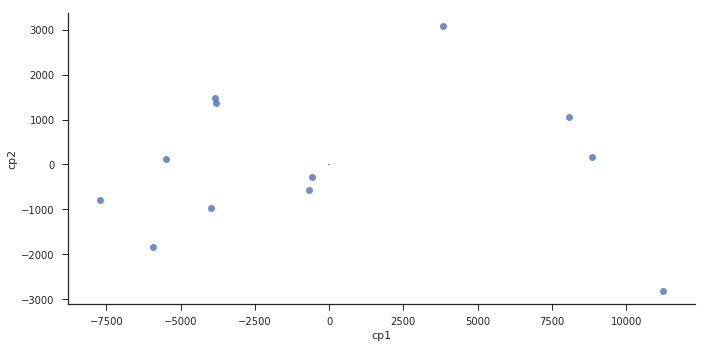

In [26]:
# diagrama de dispersão dos 2 primeiros CPs usando seaborn
sns.lmplot('cp1', 'cp2', fit_reg=False, data=resultado, aspect=2)
plt.hlines(0, -4, 4, color='gray')
plt.vlines(0, -4, 4, color='gray');

In [27]:
# para tirar as linhas em volta do gráfico
plt.rc('axes.spines', top=False, right=False, left=False, bottom=False)
# para que as linhas em volta do gráfico voltem a aparecer
# plt.rc('axes.spines', top=True, right=True, left=True, bottom=True)

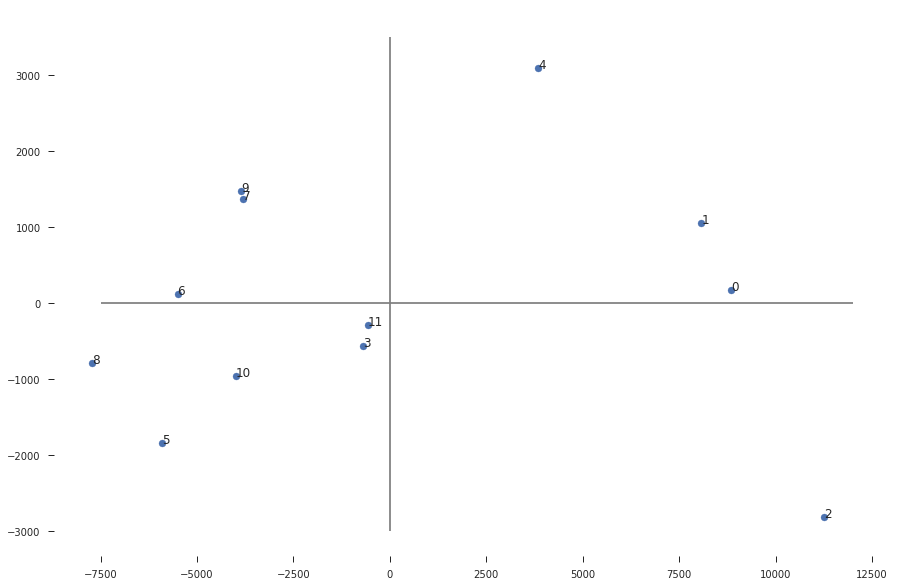

In [28]:
# diagrama de dispersão identificando os índices
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.scatter(resultado.cp1, resultado.cp2)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (resultado.cp1[i], resultado.cp2[i]))
plt.hlines(0, -7500, 12000, color='gray')
plt.vlines(0, -3000, 3500, color='gray');

## 2 ACP usando a matriz de correlações (melhor opção)

In [29]:
pca = PCA() 
resultado_pca = pca.fit_transform(scale(X))   # scale(X) padroniza os dados, como se usássemos a matriz R

In [30]:
resultado = pd.DataFrame({'cp1': resultado_pca[:, 0], 'cp2': resultado_pca[:, 1]})

In [31]:
# coeficientes dos CPs (autovetores)
# cada linha é um CP
pca.components_

array([[ 0.61670267,  0.55679445,  0.556469  ],
       [-0.00126721, -0.70619694,  0.70801432],
       [ 0.78719515, -0.43733949, -0.43480796]])

Interpretação:

- Y1: índice de desempenho global da empresa (valores altos positivos indicam empresas que tiveram ganhos B, L e P maiores do que a média)
- Y2: comparação entre L e P (valores ~ 0 indicam empresas em que L está em equilíbrio com P)
- Y3: comparação de B com o índice composto por por L e P (representa pouco da variação total, mas pode ser de interesse para o pesquisador)

In [32]:
# variâncias dos CPs (autovalores)
pca.explained_variance_

array([ 2.71912594,  0.46199796,  0.09160337])

In [33]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  83.08,   97.2 ,  100.  ])

In [34]:
# escores dos dois primeiros CPs
resultado

,cp1,cp2
0,1.849933,0.645271
1,1.215910,1.071540
2,3.841723,-0.681407
3,0.624086,-0.958889
4,-0.229387,1.196460
5,-1.223956,-0.213646
6,-1.084577,-0.514195
7,-1.375958,0.276384
8,-1.886702,-0.128149
9,-1.171209,-0.017351


In [35]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  83.08,   97.2 ,  100.  ])

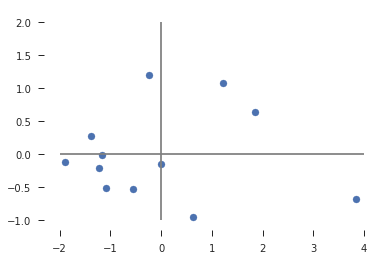

In [36]:
plt.scatter(resultado_pca[:, 0], resultado_pca[:, 1])
plt.hlines(0, -2, 4, color='gray')
plt.vlines(0, -1, 2, color='gray');

In [37]:
resultado

,cp1,cp2
0,1.849933,0.645271
1,1.215910,1.071540
2,3.841723,-0.681407
3,0.624086,-0.958889
4,-0.229387,1.196460
5,-1.223956,-0.213646
6,-1.084577,-0.514195
7,-1.375958,0.276384
8,-1.886702,-0.128149
9,-1.171209,-0.017351


In [38]:
# mostrar escores do primeiro CP 
escores_pc1 = pd.DataFrame(data=resultado_pca[:, 0], columns=['CP1'])

In [39]:
escores_pc1

,CP1
0,1.849933
1,1.215910
2,3.841723
3,0.624086
4,-0.229387
5,-1.223956
6,-1.084577
7,-1.375958
8,-1.886702
9,-1.171209


In [40]:
# só mostrando os menores ou maiores escores do CP1 (ascending=True é para ordem crescente)
(escores_pc1
 .sort_values(by='CP1', ascending=True)
 .loc[:,['CP1']]
 .iloc[:20,:])

,CP1
8,-1.886702
7,-1.375958
5,-1.223956
9,-1.171209
6,-1.084577
10,-0.556536
4,-0.229387
11,-0.003327
3,0.624086
1,1.215910


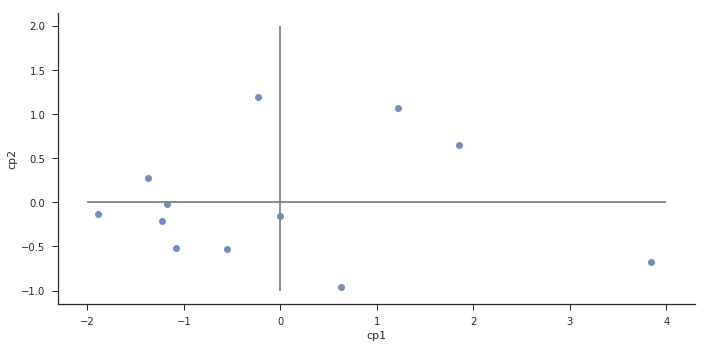

In [41]:
sns.lmplot('cp1', 'cp2', fit_reg=False, data=resultado, aspect=2)
plt.hlines(0, -2, 4, color='gray')
plt.vlines(0, -1, 2, color='gray');

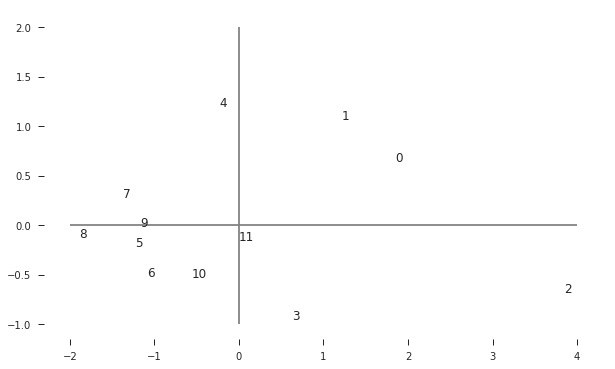

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(resultado.cp1, resultado.cp2, s=0)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (resultado.cp1[i], resultado.cp2[i]))
plt.hlines(0, -2, 4, color='gray')
plt.vlines(0, -1, 2, color='gray');

### Dados de poluição do ar

- $SO2$: SO2 content of air in micrograms per cubic metre;
- $temp$: average annual temperature in degrees Fahrenheit;
- $manu$: number of manufacturing enterprises employing 20 or more workers;
- $popul$: population size (1970 census) in thousands;
- $wind$: average annual wind speed in miles per hour;
- $precip$: average annual precipitation in inches;
- $predays$: average number of days with precipitation per year.

In [43]:
air = pd.read_csv('air.csv', index_col='city')

In [44]:
air.head(10)

,SO2,temp,manu,popul,wind,precip,predays
city,,,,,,,
Albany,46,47.6,44,116,8.8,33.36,135
Albuquerque,11,56.8,46,244,8.9,7.77,58
Atlanta,24,61.5,368,497,9.1,48.34,115
Baltimore,47,55.0,625,905,9.6,41.31,111
Buffalo,11,47.1,391,463,12.4,36.11,166
Charleston,31,55.2,35,71,6.5,40.75,148
Chicago,110,50.6,3344,3369,10.4,34.44,122
Cincinnati,23,54.0,462,453,7.1,39.04,132
Cleveland,65,49.7,1007,751,10.9,34.99,155


In [45]:
X = air.iloc[:,1:7]

In [46]:
X.head()

,temp,manu,popul,wind,precip,predays
city,,,,,,
Albany,47.6,44,116,8.8,33.36,135
Albuquerque,56.8,46,244,8.9,7.77,58
Atlanta,61.5,368,497,9.1,48.34,115
Baltimore,55.0,625,905,9.6,41.31,111
Buffalo,47.1,391,463,12.4,36.11,166


In [47]:
pca = PCA() 
resultado_pca = pca.fit_transform(scale(X))   # scale(X) padroniza os dados, como se usássemos a matriz R

In [84]:
resultado = pd.DataFrame({'cp1':resultado_pca[:, 0], 'cp2':resultado_pca[:, 1]}, index=X.index)

In [86]:
# coeficientes dos CPs (autovetores)
# cada linha é um CP
pca.components_

array([[-0.32964613,  0.61154243,  0.57782195,  0.35383877, -0.04080701,
         0.23791593],
       [ 0.1275974 ,  0.16805772,  0.22245325, -0.13079154, -0.62285781,
        -0.70776534],
       [ 0.67168611,  0.27288633,  0.35037413, -0.29725334,  0.50456294,
        -0.09308852],
       [ 0.30645728, -0.13684076, -0.07248126,  0.86942583,  0.17114826,
        -0.31130693],
       [ 0.55805638, -0.10204211,  0.07806551,  0.11326688, -0.56818342,
         0.58000387],
       [ 0.1361878 ,  0.70297051, -0.69464131,  0.02452501, -0.06062222,
         0.02196062]])

In [87]:
# variâncias dos CPs (autovalores)
pca.explained_variance_

array([ 2.25106671,  1.53744202,  1.42951535,  0.77923256,  0.11743492,
        0.03530845])

In [88]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 36.6 ,  61.6 ,  84.84,  97.51,  99.42,  99.99])

In [89]:
# os três primeiros CPs
print(pca.components_[0:3, :])

[[-0.32964613  0.61154243  0.57782195  0.35383877 -0.04080701  0.23791593]
 [ 0.1275974   0.16805772  0.22245325 -0.13079154 -0.62285781 -0.70776534]
 [ 0.67168611  0.27288633  0.35037413 -0.29725334  0.50456294 -0.09308852]]


In [90]:
X.columns

Index(['temp', 'manu', 'popul', 'wind', 'precip', 'predays'], dtype='object')

Interpretação:

- Y1: índice global de qualidade de vida - escores altos indicam cidades maiores, com mais fábricas, mais gente, mais vento, mais dias chuvosos, temp. baixas
- Y2: índice de chuvas - escores altos negativos indicam cidades chuvosas
- Y3: leva em conta chuvas e temperatura - altos valores para cidades quentes e úmidas e baixos para frias e secas

In [91]:
# escores dos dois primeiros CPs
resultado

,cp1,cp2
city,,
Albany,-0.538946,-0.792069
Albuquerque,-1.417093,2.865890
Atlanta,-0.598995,-0.587236
Baltimore,0.509380,-0.028754
Buffalo,1.390709,-1.880301
Charleston,-1.429753,-1.210584
Chicago,6.513882,1.668382
Cincinnati,-0.508221,-0.486010
Cleveland,1.766279,-1.039427


In [92]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 36.6 ,  61.6 ,  84.84,  97.51,  99.42,  99.99])

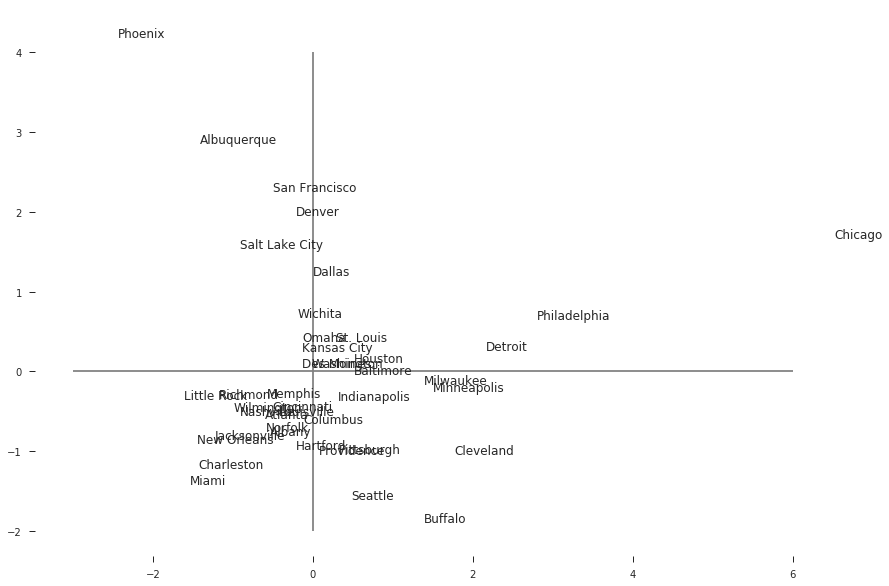

In [101]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.scatter(resultado.cp1, resultado.cp2, s=0)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (resultado.cp1[i], resultado.cp2[i]))
plt.hlines(0, -3, 6, color='gray')
plt.vlines(0, -2, 4, color='gray');

Interpretação:

- Y1: índice global de qualidade de vida - escores altos indicam cidades maiores, com mais fábricas, mais gente, mais vento, mais dias chuvosos, temp. baixas
- Y2: índice de chuvas - escores altos negativos indicam cidades chuvosas
- Y3: leva em conta chuvas e temperatura - altos valores para cidades quentes e úmidas e baixos para frias e secas